**Assignment 3 By Aimal Dastagirzada**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd 

In [4]:
df = pd.read_csv("/Users/aimaldastagirzada/Downloads/kc_house_data.csv")

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


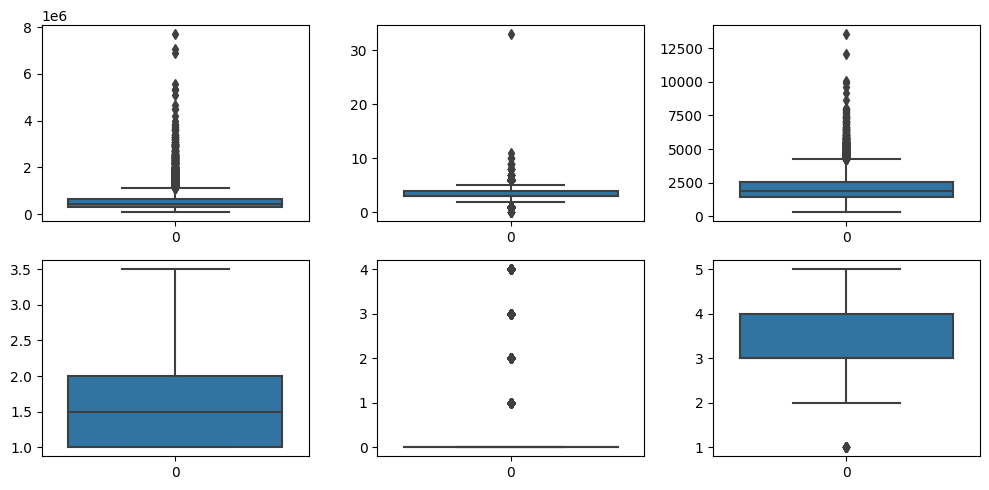

In [8]:
#Box plot to chck for outliers
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['bedrooms'], ax = axs[0,1])
plt3 = sns.boxplot(df['sqft_living'], ax = axs[0,2])
plt4 = sns.boxplot(df['floors'], ax = axs[1,0])
plt5 = sns.boxplot(df['view'], ax = axs[1,1])
plt6 = sns.boxplot(df['condition'], ax = axs[1,2])
plt.tight_layout()

In [9]:
#Function for removing outliers using z score
def remove_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.abs((data - mean) / std)
    outliers = np.where(z_scores > threshold)
    clean_data = data[~np.isin(range(len(data)), outliers)]
    return clean_data
data = df['price']
df['price'] = remove_outliers_zscore(data)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21207 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

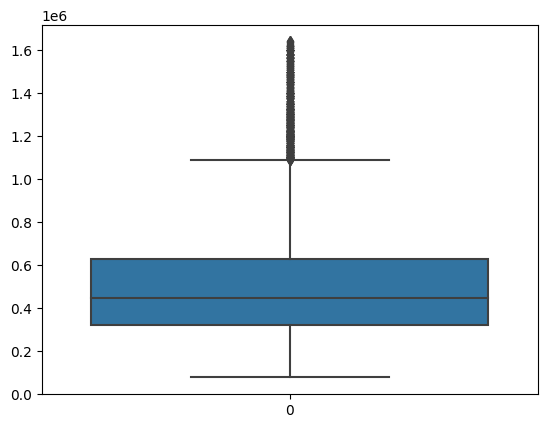

In [11]:
sns.boxplot(df['price'])

In [12]:
data = df['sqft_living']
df ['sqft_living']= remove_outliers_zscore(data)

<Axes: >

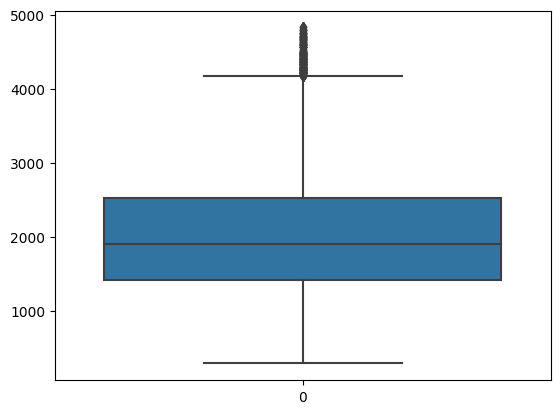

In [13]:
sns.boxplot(df['sqft_living'])

In [14]:
df.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21207 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21365 non-null  float64
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
data = df['bedrooms']
df ['bedrooms']= remove_outliers_zscore(data)

<Axes: >

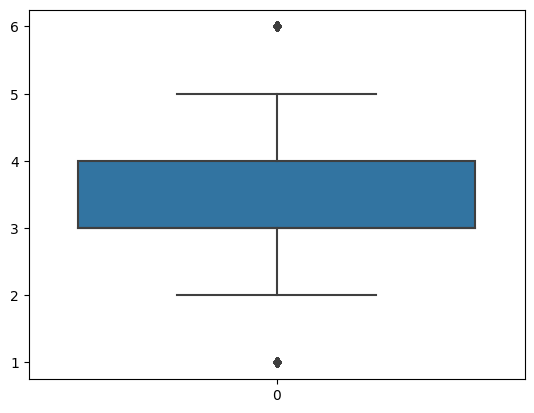

In [16]:
sns.boxplot(df['bedrooms'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21207 non-null  float64
 3   bedrooms       21538 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21365 non-null  float64
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
df_2 = df.copy()

In [19]:
df_2.dropna(how='any', inplace=True)

In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21027 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21027 non-null  int64  
 1   date           21027 non-null  object 
 2   price          21027 non-null  float64
 3   bedrooms       21027 non-null  float64
 4   bathrooms      21027 non-null  float64
 5   sqft_living    21027 non-null  float64
 6   sqft_lot       21027 non-null  int64  
 7   floors         21027 non-null  float64
 8   waterfront     21027 non-null  int64  
 9   view           21027 non-null  int64  
 10  condition      21027 non-null  int64  
 11  grade          21027 non-null  int64  
 12  sqft_above     21027 non-null  int64  
 13  sqft_basement  21027 non-null  int64  
 14  yr_built       21027 non-null  int64  
 15  yr_renovated   21027 non-null  int64  
 16  zipcode        21027 non-null  int64  
 17  lat            21027 non-null  float64
 18  long       

In [21]:
#Ordinary least sqaures method to check relation between varib
results = ols("price ~ bedrooms + sqft_living + floors", data= df_2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     5415.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:16:12   Log-Likelihood:            -2.8549e+05
No. Observations:               21027   AIC:                         5.710e+05
Df Residuals:                   21023   BIC:                         5.710e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.372e+05   5972.822     22.971      

In [22]:
"y_hat = 1.372e+05 - 3.663e+04 bedrooms + 227.3246sqft_living+ 2.082e+04floors"

'y_hat = 1.372e+05 - 3.663e+04 bedrooms + 227.3246sqft_living+ 2.082e+04floors'

In [23]:
df_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
1.372e+05 - 3.663e+04 *(3) + 227.3246*(1180)+ 2.082e+04*(1)

316373.028

In [25]:
pred_vals = results.predict(df_2[['bedrooms','sqft_living','floors']])
pred_vals

0        316388.315500
1        653194.460358
2        259811.562423
3        457075.172823
4        430050.618534
             ...      
21608    437601.812472
21609    557463.727371
21610    337467.656363
21611    432689.592473
21612    337467.656363
Length: 21027, dtype: float64

In [26]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df_2['price']], axis=1)

In [27]:
res

,y_hat,price
0,316388.315500,221900.0
1,653194.460358,538000.0
2,259811.562423,180000.0
3,457075.172823,604000.0
4,430050.618534,510000.0
...,...,...
21608,437601.812472,360000.0
21609,557463.727371,400000.0
21610,337467.656363,402101.0
21611,432689.592473,400000.0


In [28]:
res['error'] = res['y_hat'] - res['price']

In [29]:
res.head(1)

,y_hat,price,error
0,316388.3155,221900.0,94488.3155


In [30]:
res['sq_error'] = res['error']**2

In [31]:
np.sqrt(res['sq_error'].mean())

190725.45379861462

(array([  23.,   94.,  176.,  452., 1156., 3762., 7568., 6394., 1294.,
         108.]),
 array([-1053443.28838678,  -892023.14729444,  -730603.00620211,
         -569182.86510977,  -407762.72401743,  -246342.58292509,
          -84922.44183275,    76497.69925958,   237917.84035192,
          399337.98144426,   560758.1225366 ]),
 <BarContainer object of 10 artists>)

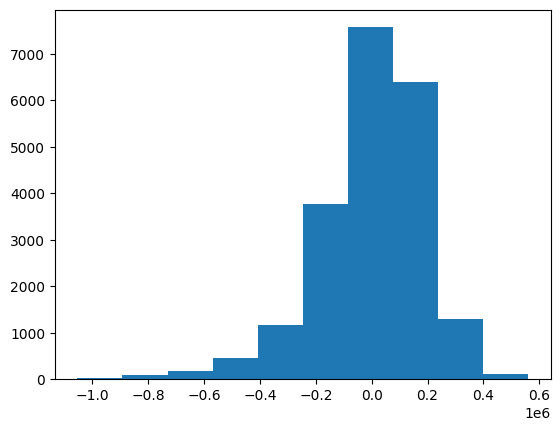

In [32]:
plt.hist(res['error'])

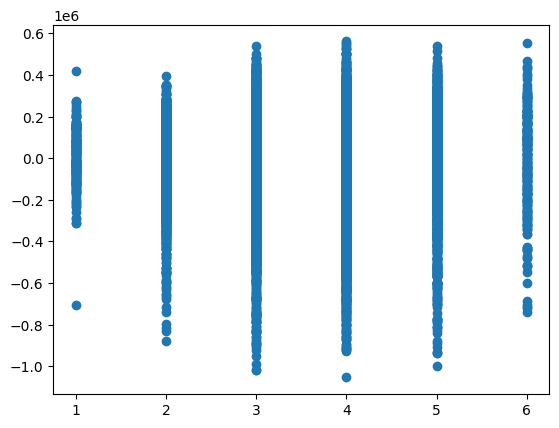

In [33]:
plt.scatter(df_2['bedrooms'], res  ['error'])

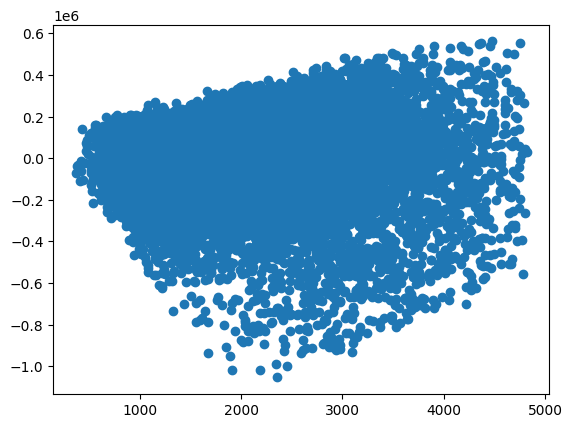

In [34]:
# The graph mostly Under predicts sqft_living
plt.scatter(df_2['sqft_living'], res  ['error'])

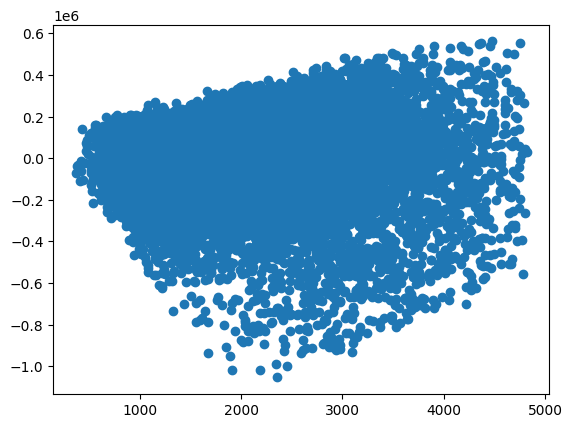

In [35]:
plt.scatter(df_2['sqft_living'], res  ['error'])

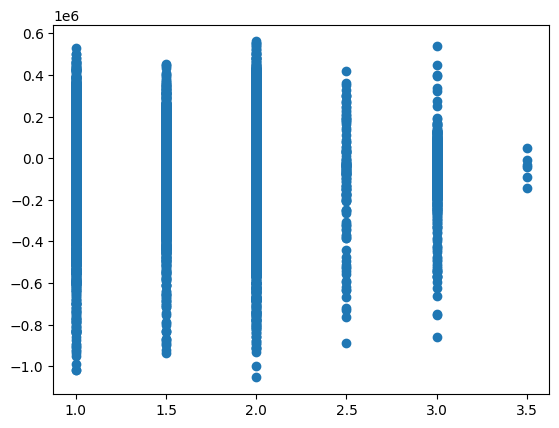

In [36]:
plt.scatter(df_2['floors'], res  ['error'])

((array([-3.99052153, -3.77496589, -3.65704087, ...,  3.65704087,
          3.77496589,  3.99052153]),
  array([-1053443.28838678, -1019013.83237172, -1017664.72207056, ...,
           551883.09535499,   552752.41586919,   560758.1225366 ])),
 (185931.20230158803, 2.656284999797651e-08, 0.9746851558123251))

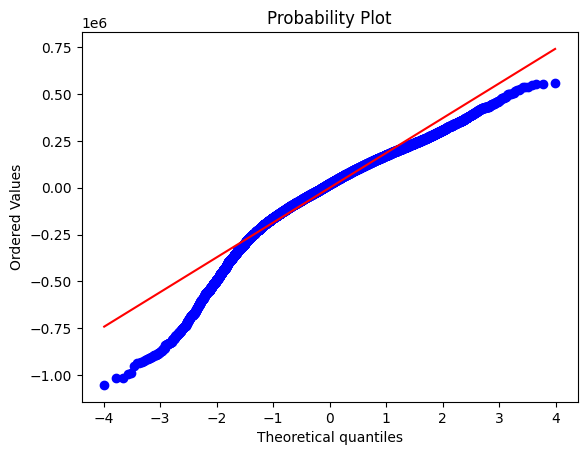

In [37]:
#In the beginning the points are not that precise but later then it tends to predict accurately 
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [38]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_sqft_living  dfb_floors       cooks_d   
0          -0.002984     -0.000920         0.002695    0.001892  7.264666e-06  \
1          -0.000619      0.004086        -0.003733   -0.002936  1.317623e-05   
2          -0.005131      0.002250         0.001782    0.001208  8.721579e-06   
3           0.000149      0.005081        -0.001832   -0.004690  1.973267e-05   
4           0.002755     -0.000635         0.000123   -0.002359  3.904594e-06   
...              ...           ...              ...         ...           ...   
21608       0.002704     -0.000410         0.004098   -0.009088  2.333892e-05   
21609       0.004911     -0.004119         0.002217   -0.005244  1.981574e-05   
21610       0.002037     -0.002138        -0.001936    0.003360  7.664907e-06   
21611       0.000007      0.000038         0.000847   -0.001434  9.600211e-07   
21612      -0.000393      0.000412         0.000373   -0.000648  2.852090e-07   

       standard_resid  hat_

In [39]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_sqft_living,dfb_floors,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.002984,-0.000920,0.002695,0.001892,7.264666e-06,-0.495398,0.000118,-0.005391,-0.495389,-0.005391
1,-0.000619,0.004086,-0.003733,-0.002936,1.317623e-05,-0.603967,0.000144,-0.007260,-0.603958,-0.007260
2,-0.005131,0.002250,0.001782,0.001208,8.721579e-06,-0.418465,0.000199,-0.005906,-0.418457,-0.005906
3,0.000149,0.005081,-0.001832,-0.004690,1.973267e-05,0.770325,0.000133,0.008884,0.770318,0.008884
4,0.002755,-0.000635,0.000123,-0.002359,3.904594e-06,0.419164,0.000089,0.003952,0.419156,0.003952
...,...,...,...,...,...,...,...,...,...,...
21608,0.002704,-0.000410,0.004098,-0.009088,2.333892e-05,-0.406953,0.000563,-0.009662,-0.406945,-0.009662
21609,0.004911,-0.004119,0.002217,-0.005244,1.981574e-05,-0.825574,0.000116,-0.008903,-0.825567,-0.008903
21610,0.002037,-0.002138,-0.001936,0.003360,7.664907e-06,0.338895,0.000267,0.005537,0.338887,0.005537
21611,0.000007,0.000038,0.000847,-0.001434,9.600211e-07,-0.171391,0.000131,-0.001960,-0.171387,-0.001960


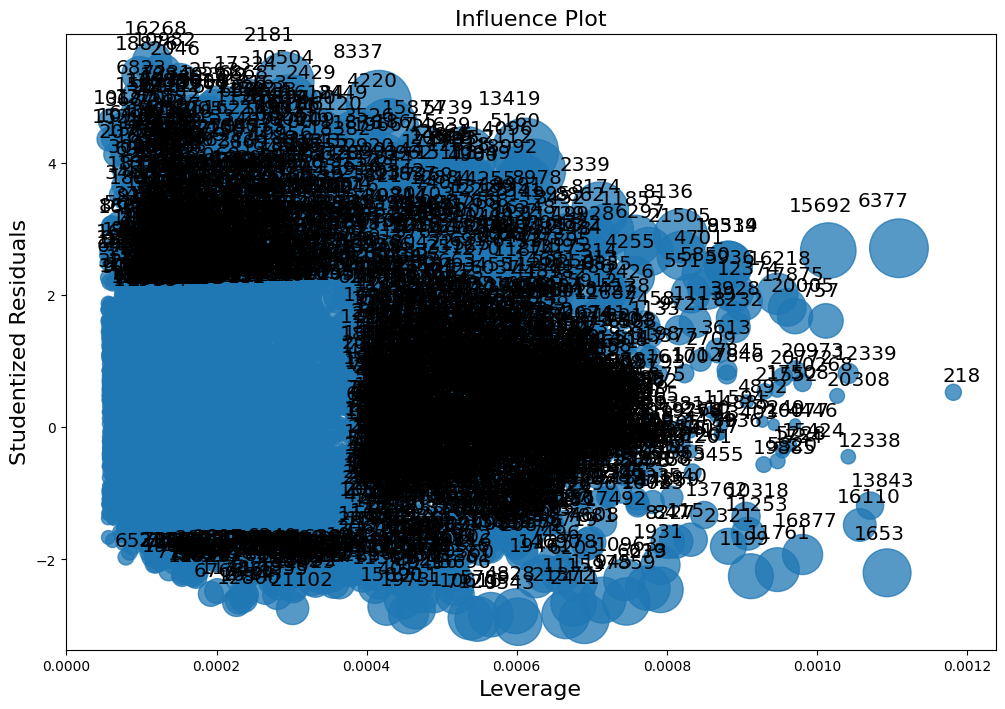

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [41]:
df_3 = df_2.copy()

In [42]:
df_3.drop(15692, inplace= True)
df_3.drop(6377, inplace= True)

In [43]:
results = ols("price ~ bedrooms + sqft_living + floors", data= df_3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     5410.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:19:23   Log-Likelihood:            -2.8546e+05
No. Observations:               21025   AIC:                         5.709e+05
Df Residuals:                   21021   BIC:                         5.710e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.375e+05   5972.317     23.019      

In [44]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21025 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21025 non-null  int64  
 1   date           21025 non-null  object 
 2   price          21025 non-null  float64
 3   bedrooms       21025 non-null  float64
 4   bathrooms      21025 non-null  float64
 5   sqft_living    21025 non-null  float64
 6   sqft_lot       21025 non-null  int64  
 7   floors         21025 non-null  float64
 8   waterfront     21025 non-null  int64  
 9   view           21025 non-null  int64  
 10  condition      21025 non-null  int64  
 11  grade          21025 non-null  int64  
 12  sqft_above     21025 non-null  int64  
 13  sqft_basement  21025 non-null  int64  
 14  yr_built       21025 non-null  int64  
 15  yr_renovated   21025 non-null  int64  
 16  zipcode        21025 non-null  int64  
 17  lat            21025 non-null  float64
 18  long       

In [45]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_sqft_living  dfb_floors       cooks_d   
0          -0.002984     -0.000923         0.002698    0.001892  7.274474e-06  \
1          -0.000620      0.004088        -0.003736   -0.002933  1.317597e-05   
2          -0.005137      0.002252         0.001783    0.001210  8.746673e-06   
3           0.000145      0.005087        -0.001838   -0.004691  1.976613e-05   
4           0.002755     -0.000636         0.000124   -0.002359  3.906325e-06   
...              ...           ...              ...         ...           ...   
21608       0.002704     -0.000414         0.004095   -0.009079  2.329589e-05   
21609       0.004912     -0.004121         0.002219   -0.005243  1.980674e-05   
21610       0.002036     -0.002136        -0.001935    0.003359  7.663791e-06   
21611       0.000008      0.000037         0.000847   -0.001433  9.579617e-07   
21612      -0.000394      0.000413         0.000374   -0.000650  2.864794e-07   

       standard_resid  hat_

In [46]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_sqft_living,dfb_floors,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.002984,-0.000923,0.002698,0.001892,7.274474e-06,-0.495660,0.000118,-0.005394,-0.495651,-0.005394
1,-0.000620,0.004088,-0.003736,-0.002933,1.317597e-05,-0.603741,0.000145,-0.007260,-0.603732,-0.007260
2,-0.005137,0.002252,0.001783,0.001210,8.746673e-06,-0.419051,0.000199,-0.005915,-0.419043,-0.005915
3,0.000145,0.005087,-0.001838,-0.004691,1.976613e-05,0.770843,0.000133,0.008892,0.770836,0.008892
4,0.002755,-0.000636,0.000124,-0.002359,3.906325e-06,0.419253,0.000089,0.003953,0.419245,0.003953
...,...,...,...,...,...,...,...,...,...,...
21608,0.002704,-0.000414,0.004095,-0.009079,2.329589e-05,-0.406541,0.000563,-0.009653,-0.406533,-0.009653
21609,0.004912,-0.004121,0.002219,-0.005243,1.980674e-05,-0.825176,0.000116,-0.008901,-0.825170,-0.008901
21610,0.002036,-0.002136,-0.001935,0.003359,7.663791e-06,0.338869,0.000267,0.005537,0.338862,0.005537
21611,0.000008,0.000037,0.000847,-0.001433,9.579617e-07,-0.171194,0.000131,-0.001958,-0.171190,-0.001957


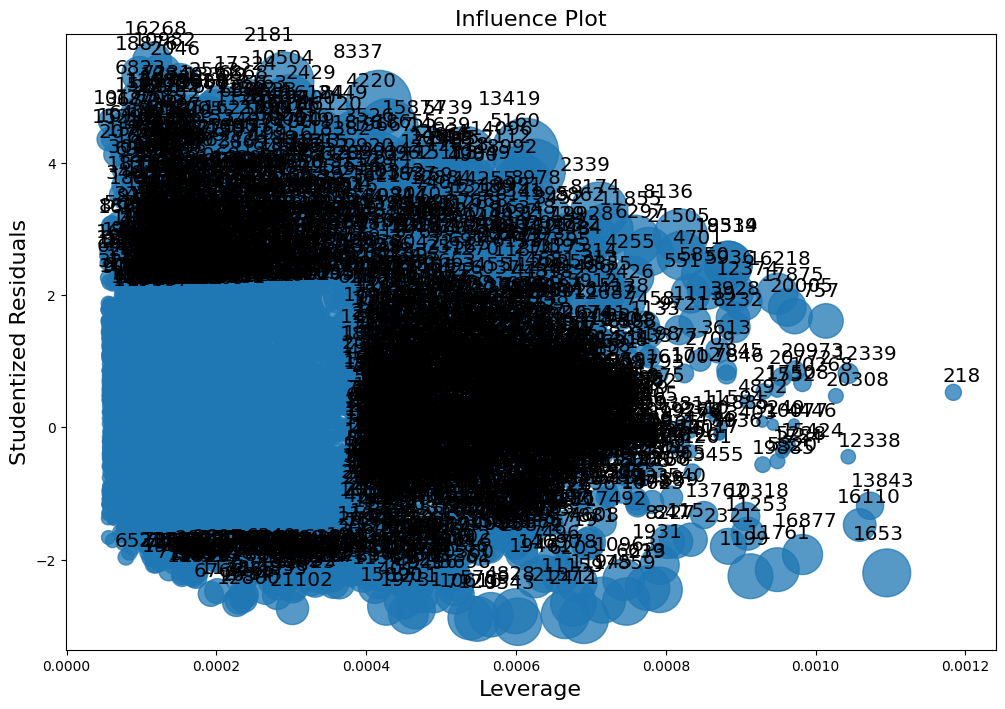

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [48]:
df_4 =df_3.copy()

In [49]:
dummies_view = pd.get_dummies(df_4.view, dtype=int)
dummies_view.rename(columns = {0: 'Terrible', 1: 'Mediocre', 2: 'Okay', 3: 'Decent', 4: 'Great'}, inplace = True)
df_4 = pd.concat([df_4,dummies_view], axis=1)

In [50]:
results = ols("price ~ bedrooms + sqft_living + floors +view", data= df_4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4600.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:22:20   Log-Likelihood:            -2.8487e+05
No. Observations:               21025   AIC:                         5.697e+05
Df Residuals:                   21020   BIC:                         5.698e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.274e+05   5812.957     21.919      

In [51]:
dummies_grade = pd.get_dummies(df_4.grade, dtype = int)
dummies_grade.rename(columns={1:'worst grade', 3:'terrible grade', 4:'bad grade', 5:'ok grade', 6:'neutral grade', 7:'good grade', 8:'better grade', 9:'great grade', 10:'excellent grade', 11: 'outstanding grade', 12:'best grade', 13:'Superb'}, inplace = True)
df_4 = pd.concat([df_4,dummies_grade], axis = 1)


In [52]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21025 entries, 0 to 21612
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21025 non-null  int64  
 1   date               21025 non-null  object 
 2   price              21025 non-null  float64
 3   bedrooms           21025 non-null  float64
 4   bathrooms          21025 non-null  float64
 5   sqft_living        21025 non-null  float64
 6   sqft_lot           21025 non-null  int64  
 7   floors             21025 non-null  float64
 8   waterfront         21025 non-null  int64  
 9   view               21025 non-null  int64  
 10  condition          21025 non-null  int64  
 11  grade              21025 non-null  int64  
 12  sqft_above         21025 non-null  int64  
 13  sqft_basement      21025 non-null  int64  
 14  yr_built           21025 non-null  int64  
 15  yr_renovated       21025 non-null  int64  
 16  zipcode            21025 no

In [53]:
results = ols("price ~ bedrooms + sqft_living + floors +grade", data= df_4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     5299.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:22:20   Log-Likelihood:            -2.8415e+05
No. Observations:               21025   AIC:                         5.683e+05
Df Residuals:                   21020   BIC:                         5.683e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -3.73e+05   1.12e+04    -33.441      

In [54]:
df_4['condition'].unique()

array([3, 5, 4, 1, 2])

In [55]:
dummies_condition = pd.get_dummies(df_4.condition, dtype = int)
dummies_condition.rename(columns={1:'poor condition', 2:'fair condition', 3:'average condition', 4:'good condition', 5:'best grade'}, inplace = True)
df_4 = pd.concat([df_4,dummies_condition], axis = 1)

In [56]:
results = ols("price ~ bedrooms + sqft_living + floors +condition", data= df_4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     4256.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:22:20   Log-Likelihood:            -2.8524e+05
No. Observations:               21025   AIC:                         5.705e+05
Df Residuals:                   21020   BIC:                         5.705e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.704e+04   9767.462     -2.768      

In [91]:
df_4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,better grade,great grade,excellent grade,outstanding grade,best grade,poor condition,fair condition,average condition,good condition,best grade
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21609,6600060120,2015-02-23,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21610,1523300141,2014-06-23,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
21611,291310100,2015-01-16,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [57]:
df_4['date'] = pd.to_datetime(df_4['date'])

In [58]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21025 entries, 0 to 21612
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21025 non-null  int64         
 1   date               21025 non-null  datetime64[ns]
 2   price              21025 non-null  float64       
 3   bedrooms           21025 non-null  float64       
 4   bathrooms          21025 non-null  float64       
 5   sqft_living        21025 non-null  float64       
 6   sqft_lot           21025 non-null  int64         
 7   floors             21025 non-null  float64       
 8   waterfront         21025 non-null  int64         
 9   view               21025 non-null  int64         
 10  condition          21025 non-null  int64         
 11  grade              21025 non-null  int64         
 12  sqft_above         21025 non-null  int64         
 13  sqft_basement      21025 non-null  int64         
 14  yr_built   

In [59]:
#Resampling data set by 2 days
daily_dataset = df_4.set_index('date').resample("2D").agg({'price':'mean','sqft_living':'mean','floors':'mean', 'bedrooms':'mean','grade':'mean'}).ffill()

In [60]:
daily_dataset

,price,sqft_living,floors,bedrooms,grade
date,,,,,
2014-05-02,4.963247e+05,2053.142857,1.442857,3.357143,7.757143
2014-05-04,5.613897e+05,2143.852273,1.539773,3.465909,7.818182
2014-05-06,5.062178e+05,2012.906433,1.447368,3.339181,7.608187
2014-05-08,4.899129e+05,1985.917197,1.503185,3.305732,7.630573
2014-05-10,5.164786e+05,2075.714286,1.785714,3.714286,7.714286
...,...,...,...,...,...
2015-05-19,4.500000e+05,1870.000000,1.500000,5.000000,7.000000
2015-05-21,4.500000e+05,1870.000000,1.500000,5.000000,7.000000
2015-05-23,4.455000e+05,1390.000000,1.000000,2.000000,6.000000


In [61]:
results = ols("price ~  sqft_living + bedrooms + floors + grade", data= daily_dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     146.3
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           5.07e-57
Time:                        16:22:20   Log-Likelihood:                -2334.6
No. Observations:                 196   AIC:                             4679.
Df Residuals:                     191   BIC:                             4696.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.247e+05   9.13e+04      4.652      

In [62]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [64]:
categorical_features = ['grade']
numerical_features = ['sqft_living','bedrooms', 'floors']
target = 'price'

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_4[categorical_features + numerical_features]
                                                    ,df_4[target],
                                                    test_size = 0.3, random_state=1234)

In [66]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [67]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [68]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [69]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bedrooms',
                                                   'floors'])])),
                ('regressor', LinearRegression())])

In [70]:
pred = linear_regression.predict(X_test)

In [71]:
pred

array([414649., 390014., 480097., ..., 593594., 510402., 518194.])

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
#Mean sqaured error of Linear Regression model which shows the least value 
np.sqrt(mean_squared_error(pred,y_test))


177592.55291710063

In [74]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [75]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bedrooms',
                                                   'floors'])])),
                ('regressor', Ridge(alpha=3.0))])

In [76]:
pred_ridge = ridge_regression.predict(X_test)

In [77]:
#Mean sqaured error of ridge model 

np.sqrt(mean_squared_error(pred_ridge,y_test))


177625.2345740197

In [78]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [79]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bedrooms',
                                                   'floors'])])),
                ('regressor', Lasso())])

In [80]:
lasso_pred = lasso_regression.predict(X_test)

In [81]:
#Mean sqaured error of lasso model

np.sqrt(mean_squared_error(lasso_pred, y_test))

177593.94143191795

In [82]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [83]:
elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)

In [84]:
#Mean sqaured error of elastic model
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

187593.36247383564

In [85]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)


In [86]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']


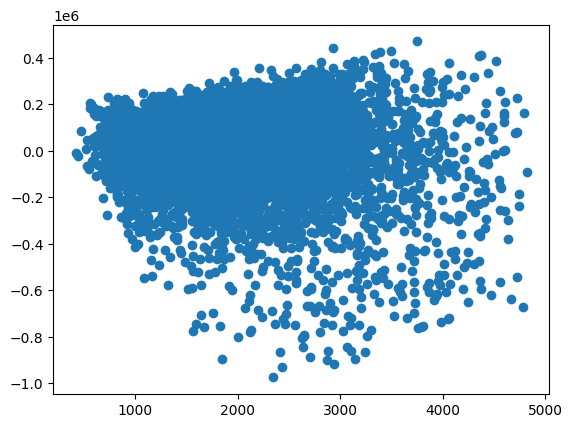

In [87]:
#Scatterplot visualizing sqft_living with residuals 
# The graph mostly Under predicts sqft_living
import matplotlib.pyplot as plt
plt.scatter(X_test['sqft_living'],elastic_net_pred['res'])

In [88]:
lasso_net_pred = pd.concat([pd.DataFrame(lasso_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)


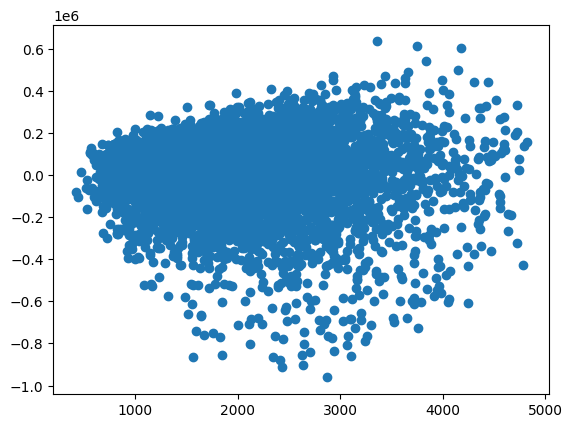

In [89]:
# The graph mostly Under predicts sqft_living
lasso_net_pred['res'] = lasso_net_pred['pred'] - lasso_net_pred['price']

plt.scatter(X_test['sqft_living'],lasso_net_pred['res'])

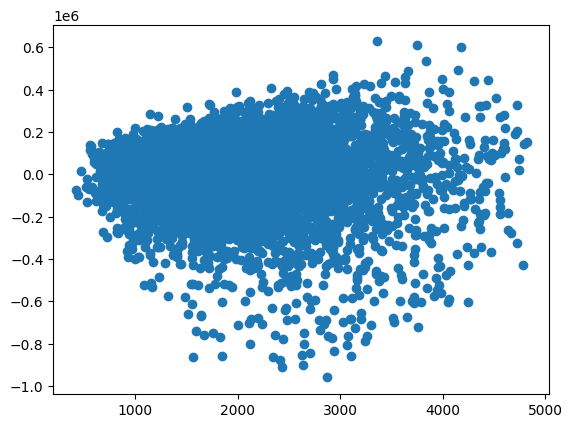

In [90]:
# The graph mostly Under predicts sqft_living
ridge_net_pred = pd.concat([pd.DataFrame(pred_ridge).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridge_net_pred['res'] = ridge_net_pred['pred'] - ridge_net_pred['price']
plt.scatter(X_test['sqft_living'],ridge_net_pred['res'])


1- Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net. 
- You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

- **Data visualization**:  We started by reading our data file and running some intital codes to see if we have any missing values. We then proceeded in making boxplots for some variables such as price, bedrooms, floors, grade, view, and condition. We saw that there are some outliers in the boxplots of variables such as price, bedrooms and sqft_living.
- **Made function to drop the outliers using the Z-score**: We then made a function to drop the outliers we had got from exploring our data through data visualization. We dropped the outlier values in order to preserve our model integrity and to ensure that our model is built on a more representative data and improve improve our model assumptions. 
- **Dropped missing values**:  we first created a new data frame after removing outliers. Then, we proceeded to drop rows with missing values (NaN) from this updated data frame. This step was essential to maintain data integrity and ensure that our subsequent analysis and modeling were based on a consistent and complete dataset.
- **Linear regression model using Ordinary least sqaures method**: The code performs a linear regression analysis to examine the relationship between house prices and three factors: the number of bedrooms, the square footage of living space, and the number of floors. The results of the analysis are presented in a summary, which provides valuable insights. The summary reveals how each factor influences house prices and whether their impact is statistically significant. It quantifies the average change in price associated with a one-unit change in each factor, helping us understand the magnitude of their effects. Additionally, the summary evaluates the goodness of fit of the model by providing the R-squared value, which indicates how well the chosen factors explain the variation in house prices. 
- We then created variable pred_vals to predict house prices based on the fitted linear regression model. We then combined the predicted house prices with acutal prices for comparison. 
- We created a probability plot the residuals and visualized it to assess wether the residuals follow a normal disturbution pattern into the model assumptions and if there is any potential deviations from normality. 
- **Influence plot**: We created an influence plot to identify any infliuential observations and found that there are some outliers that we can drop.
- **Feature engineering**: We created dummies for three variables to analyze their impact (View,Grade,Condition) and as per R-sqaure value grade had higher value indicating a better explination between our predictor and response variable. We change the date type to date from previously being object.
- **Daily data set**: We resampled our data set with the chosen dummy and ran our ols again where we found out that our nodel has improved from before.
- **Model selection**: We build all the model to evalute which model is best for our analysis and based on mean squared error we found linear regression to be the best model, since it had the lowest mean squared error. 

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

- For our evaluation of the regression model, we can used the following techniques covered in class:
- **R-squared**: It measures how well the independent variables explain the variation in house prices. A higher value indicates a better fit.
- **Mean Squared Error (MSE)**: It calculates the average difference between predicted and actual house prices. Lower values indicate better prediction accuracy. 
- **Residual analysis**: We check if the residuals (the differences between predicted and actual values) meet the assumptions of linear regression, such as linearity, independence, and normality.
- **Cross-validation**: By splitting the data into training and testing sets, we evaluate how well the model performs on unseen data.

 - After considering the above mentioned factors, we assessed each model using the provided metrics. Our evaluation showed that Linear regression exhibited the lowest mean squared error (177592.5529) compared to the other models. This finding suggests that, in our specific model, Linear regression is likely to provide more accurate predictions with minimal error compared to the other models. We also observed that the scatterplot of sqft_living has become less under-fitted compared to the initial scatter plot we created.


3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

- We started building our model for predecting the house price in King City using the Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net models. We took Mean sqaure error as our selection criteria for the model, and linear regression stood out of the other model with having the least mean sqaure error. This means that it will be more accurate as compared to the other models in predecting the price of a house.

- Based on our model the main drivers of house prices in king city are floors, sqft_living, bedrooms and grade. we can see that the variable "floors" has the highest impact. Its coefficient is 9.391e+04, indicating that for every additional floor in a house, the estimated price increases by 9.391e+04 units. This suggests that the number of floors has the strongest positive influence on house prices among the variables considered in the model followed by Sqft_living (393.2707).

- For every one-unit increase in sqft_living, the price of a house is estimated to increase by 393.2707 units, assuming all other variables are held constant. This indicates that the square footage of living space has a positive impact on house prices.
- For every increase in grade by one unit, the price of a house is estimated to decrease by 9.252e+04 units. This suggests that a higher grade may be associated with a lower price in the given model.

-For every one-unit increase in sqft_living, the price of a house is estimated to increase by 393.2707 units, assuming all other variables are held constant. This indicates that the square footage of living space has a positive impact on house prices.